<a href="https://colab.research.google.com/github/tabatalond/tabatalond/blob/main/2025_class_10_28.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
# 日本語フォントのインストール
!apt-get -y install fonts-ipafont-gothic

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-ipafont-mincho
The following NEW packages will be installed:
  fonts-ipafont-gothic fonts-ipafont-mincho
0 upgraded, 2 newly installed, 0 to remove and 38 not upgraded.
Need to get 8,237 kB of archives.
After this operation, 28.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-ipafont-gothic all 00303-21ubuntu1 [3,513 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-ipafont-mincho all 00303-21ubuntu1 [4,724 kB]
Fetched 8,237 kB in 0s (24.7 MB/s)
Selecting previously unselected package fonts-ipafont-gothic.
(Reading database ... 126718 files and directories currently installed.)
Preparing to unpack .../fonts-ipafont-gothic_00303-21ubuntu1_all.deb ...
Unpacking fonts-ipafont-gothic (00303-21ubuntu1) ...
Selecting previously unselected package fonts-ipaf

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
# 日本語フォントを指定（Windowsの場合）
plt.rcParams['font.family'] = 'MS Gothic'  # または 'MS Mincho' でもOK
plt.rcParams['axes.unicode_minus'] = False  # マイナス記号の文字化け防止


In [14]:
afgan=pd.read_csv("/content/afghan.csv")

In [15]:
# 各列ごとの欠損値数を表示
print("各列の欠損値数:")
print(afgan.isnull().sum())

各列の欠損値数:
province                 0
district                 0
village.id               0
age                      0
educ.years               0
employed                 0
income                 154
violent.exp.ISAF        25
violent.exp.taliban     54
list.group               0
list.response            0
dtype: int64


In [4]:
# listwise　除去
# 欠損値を含む行を削除（リストワイズ除去）
afgan.dropna(inplace=True)

# 結果の確認
print("除去後の行数:", len(afgan))


除去後の行数: 2554


/tmp/ipython-input-3105459831.py:40: UserWarning: Glyph 12464 (\N{KATAKANA LETTER GU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3105459831.py:40: UserWarning: Glyph 12523 (\N{KATAKANA LETTER RU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3105459831.py:40: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3105459831.py:40: UserWarning: Glyph 12503 (\N{KATAKANA LETTER PU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3105459831.py:40: UserWarning: Glyph 22238 (\N{CJK UNIFIED IDEOGRAPH-56DE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3105459831.py:40: UserWarning: Glyph 31572 (\N{CJK UNIFIED IDEOGRAPH-7B54}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3105459831.py:40: UserWarning: Glyph 32773 (\N{CJK UNIFIED IDEOGRAPH-8005}) missing from font

各グループの回答者比率（％）:
              被害なし       被害あり       回答無
ISAF     61.946260  37.145969  0.907771
Taliban  65.795207  32.244009  1.960784


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22238 (\N{CJK UNIFIED IDEOGRAPH-56DE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31572 (\N{CJK UNIFIED IDEOGRAPH-7B54}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32773 (\N{CJK UNIFIED IDEOGRAPH-8005}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27604 (\N{CJK UNIFIED IDEOGRAPH-6BD4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from font(s) DejaVu Sans.
  fig.canvas

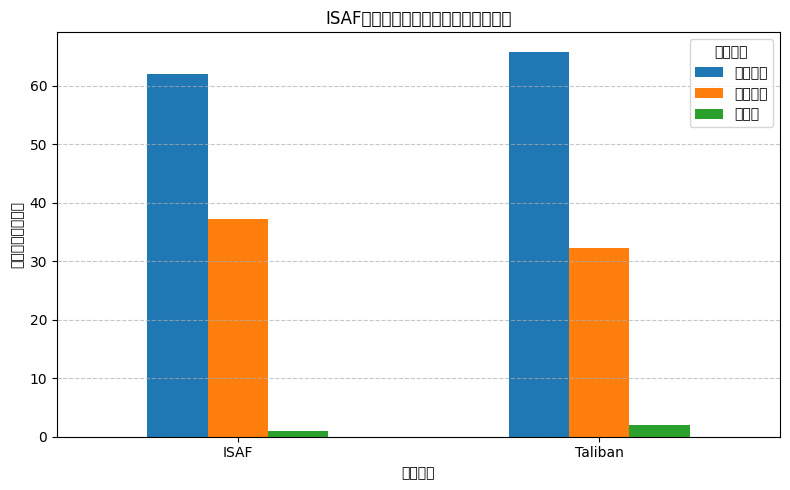

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# データ読み込み
afgan = pd.read_csv("/content/afghan.csv")

# === 欠損を含めたカテゴリーを作成 ===
def categorize_damage(x):
    if pd.isna(x):
        return "回答無"
    elif x == 1:
        return "被害あり"
    else:
        return "被害なし"

afgan["ISAF_status"] = afgan["violent.exp.ISAF"].apply(categorize_damage)
afgan["Taliban_status"] = afgan["violent.exp.taliban"].apply(categorize_damage)

# === 割合（％）計算 ===
isaf_ratio = afgan["ISAF_status"].value_counts(normalize=True) * 100
taliban_ratio = afgan["Taliban_status"].value_counts(normalize=True) * 100

# データフレーム化して並べる
df_ratio = pd.DataFrame({
    "ISAF": isaf_ratio,
    "Taliban": taliban_ratio
}).T  # 行と列を入れ替えて見やすく

print("各グループの回答者比率（％）:")
print(df_ratio)

# === 可視化 ===
df_ratio.plot(kind="bar", stacked=False, figsize=(8,5))
plt.title("ISAFとタリバンに対する被害経験比率")
plt.ylabel("回答者比率（％）")
plt.xlabel("グループ")
plt.xticks(rotation=0)
plt.legend(title="被害経験")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


In [6]:
#afgan["violent.exp.ISAF"].apply(categorize_damage)
#は、
#「violent.exp.ISAF 列の各値に、categorize_damage() 関数を1つずつ適用する」
#という意味です。


In [11]:
value = afgan["violent.exp.ISAF"].iloc[10]

In [12]:
# categorize_damage関数で分類
result = categorize_damage(value)

# 入力と出力を印字
print("元の値:", value)
print("分類結果:", result)

元の値: 1.0
分類結果: 被害あり
